In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
data = pd.read_csv("D:\桌面\数据集\阿里云天池数据\\user_action.csv") ##读取数据

# 数据说明
数据中有5个维度的字段,其分别表示用户id、商品id、用户行为类型、商品类别以及时间信息,这里我们列出这些字段的主要信息： <br>
user_id：用户id，是每一个用户的唯一标识符 <br>
item_id：商品id，是每一个商品的唯一标识符 <br>
behavior_type：用户对商品的行为类型，包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4 <br>
item_category：商品类别标识 <br>
timestamp：时间戳，是用户对商品的行为发生的时间,精确到时

# 数据清洗和处理

In [3]:
data.head(10)  ##查看前10条数据

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21
5,93784494,337869048,1,3979,2014-12-03 20
6,94832743,105749725,1,9559,2014-12-13 20
7,95290487,76866650,1,10875,2014-11-27 16
8,96610296,161166643,1,3064,2014-12-11 23
9,100684618,21751142,3,2158,2014-12-05 23


In [4]:
unique_user_id = data['user_id'].nunique()  ##用户id的数量
unique_item_id = data['item_id'].nunique()  ##商品id的数量
unique_item_category = data['item_category'].nunique()  ##商品类别的数量
print('共有{}个不同的用户，{}个不同的商品,{}个不同的商品类别' .format(unique_user_id, unique_item_id, unique_item_category))

共有10000个不同的用户，2876947个不同的商品,8916个不同的商品类别


In [5]:
data.isnull().sum()  ##查看数据中是否有缺失值

user_id          0
item_id          0
behavior_type    0
item_category    0
time             0
dtype: int64

In [6]:
data.info()  ##查看数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   item_category  int64 
 4   time           object
dtypes: int64(4), object(1)
memory usage: 467.6+ MB


In [7]:
data['user_id'] = data['user_id'].astype(object)
data['item_id'] = data['item_id'].astype(object)
data['item_category'] = data['item_category'].astype(object)

In [8]:
data.info()  ##查看数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  int64 
 3   item_category  object
 4   time           object
dtypes: int64(1), object(4)
memory usage: 467.6+ MB


In [9]:
data['date'] = data['time'].map(lambda x: x.split(' ')[0])
data['hour'] = data['time'].map(lambda x: x.split(' ')[1])

将时间中的日期和小时拆分开,方便后续进行按天分析和按每天的小时分析

In [10]:
data.head(10)  ##查看前10条数据

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21
5,93784494,337869048,1,3979,2014-12-03 20,2014-12-03,20
6,94832743,105749725,1,9559,2014-12-13 20,2014-12-13,20
7,95290487,76866650,1,10875,2014-11-27 16,2014-11-27,16
8,96610296,161166643,1,3064,2014-12-11 23,2014-12-11,23
9,100684618,21751142,3,2158,2014-12-05 23,2014-12-05,23


In [11]:
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['hour'].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   item_id        object        
 2   behavior_type  int64         
 3   item_category  object        
 4   time           object        
 5   date           datetime64[ns]
 6   hour           int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 654.6+ MB


# 数据分析和可视化

In [13]:
x = ['浏览','收藏','加购物车','购买']
y = data.groupby('behavior_type').count()['user_id']
y = y.values

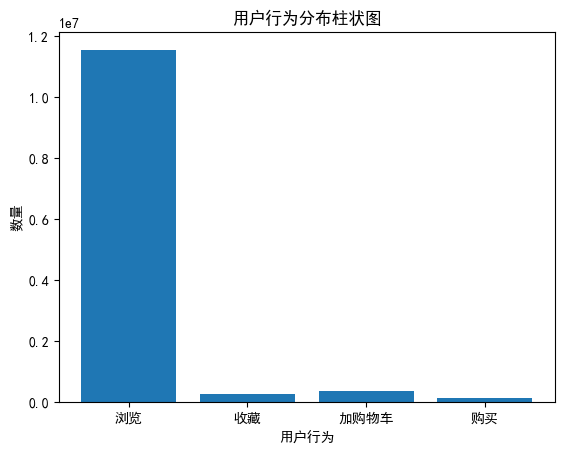

In [14]:
plt.bar(x,y)
plt.title('用户行为分布柱状图')
plt.xlabel('用户行为')
plt.ylabel('数量')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

## 流量分析
PV：PV即页面访问量，是指一定时间内用户对某个网页的访问次数<br>
UV: UV即独立访客，是指一定时间内访问某个网站的唯一用户的数量

### (1)以天为单位进行流量分析

In [15]:
PV_day = data.groupby('date').count()['user_id'].reset_index(name = 'PV_day_cnt')
PV_day.head()

,date,PV_day_cnt
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355


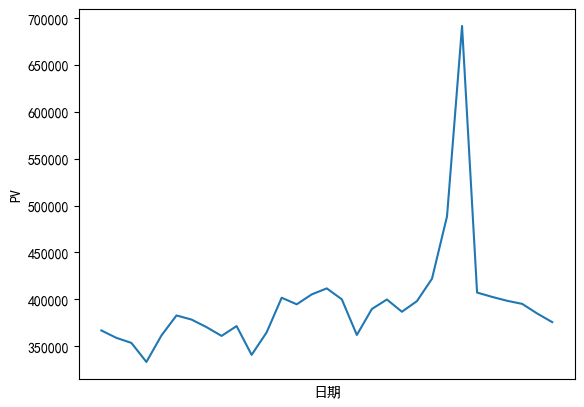

In [16]:
sns.lineplot(x = PV_day['date'],y = PV_day['PV_day_cnt'])
plt.xlabel('日期')
plt.xticks([])
plt.ylabel('PV')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

In [17]:
UV_day = data.groupby('date')['user_id'].nunique()
UV_day = UV_day.reset_index()
UV_day = UV_day.rename(columns={'user_id': 'UV_day_cnt'})
UV_day.head()

,date,UV_day_cnt
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187


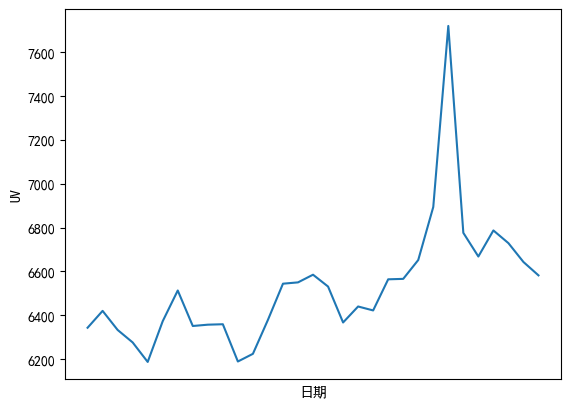

In [18]:
sns.lineplot(x=UV_day['date'], y=UV_day['UV_day_cnt'])
plt.xlabel('日期')
plt.xticks([])
plt.ylabel('UV')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

上面以天为跨度就行流量统计的时候,PV和UV均出现一个尖峰,这是双十二大促造成的,下面我们分析以小时为跨度,因为在一天当中,用户浏览购物应该也是有时段差异的

### (2)以小时为单位进行流量分析

In [19]:
PV_hour = data.groupby('hour').count()['user_id']
PV_hour = PV_hour.reset_index()
PV_hour = PV_hour.rename(columns={'user_id': 'PV_hour_cnt'})
PV_hour.head()

,hour,PV_hour_cnt
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487


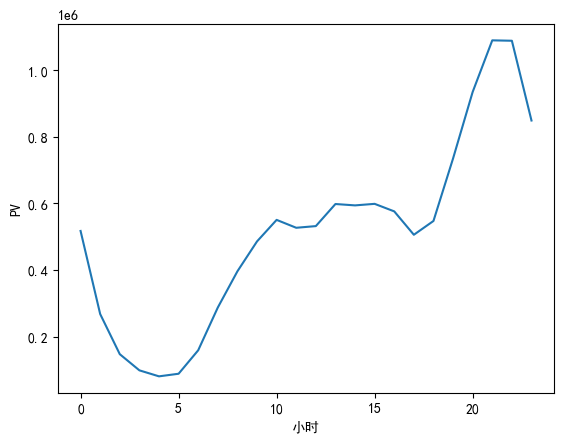

In [20]:
sns.lineplot(x = PV_hour['hour'], y = PV_hour['PV_hour_cnt'])
plt.xlabel('小时')
plt.ylabel('PV')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

In [21]:
UV_hour = data.groupby('hour')['user_id'].nunique()
UV_hour = UV_hour.reset_index()
UV_hour = UV_hour.rename(columns={'user_id': 'UV_hour_cnt'})
UV_hour.head()

,hour,UV_hour_cnt
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765


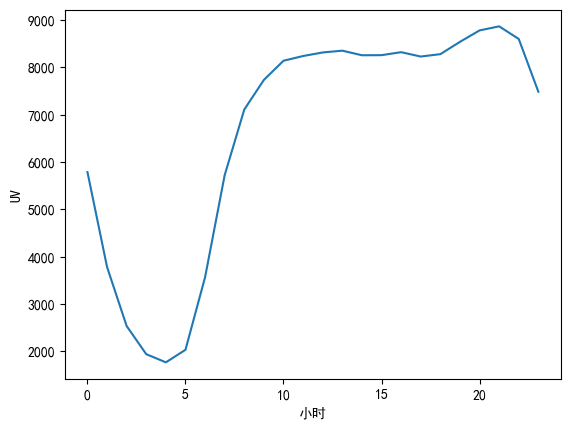

In [22]:
sns.lineplot(x = UV_hour['hour'], y = UV_hour['UV_hour_cnt'])
plt.xlabel('小时')
plt.ylabel('UV')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

可以看出大家浏览购物页面在晚上8点以后是最高的，是大家下班回到家之后的时间，这个图也符合我们的预期,下面我们来看一下双十二当天的PV和UV数据

In [23]:
PV_12_hour =  data[data['date'] == '2014-12-12'].groupby('hour')['user_id'].count()
PV_12_hour = PV_12_hour.reset_index()
PV_12_hour = PV_12_hour.rename(columns={'user_id': 'PV_12_hour_cnt'})
PV_12_hour.head()

,hour,PV_12_hour_cnt
0,0,50030
1,1,22761
2,2,11754
3,3,6173
4,4,5168


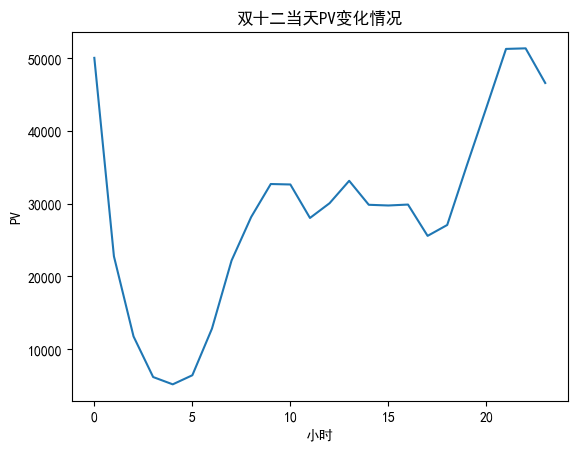

In [24]:
sns.lineplot(x= PV_12_hour['hour'], y = PV_12_hour['PV_12_hour_cnt'])
plt.xlabel('小时')
plt.ylabel('PV')
plt.title('双十二当天PV变化情况')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

In [25]:
UV_12_hour = data.groupby('hour')['user_id'].nunique()
UV_12_hour = UV_12_hour.reset_index()
UV_12_hour = UV_12_hour.rename(columns = {'user_id': 'UV_12_hour_cnt'})
UV_12_hour.head()

,hour,UV_12_hour_cnt
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765


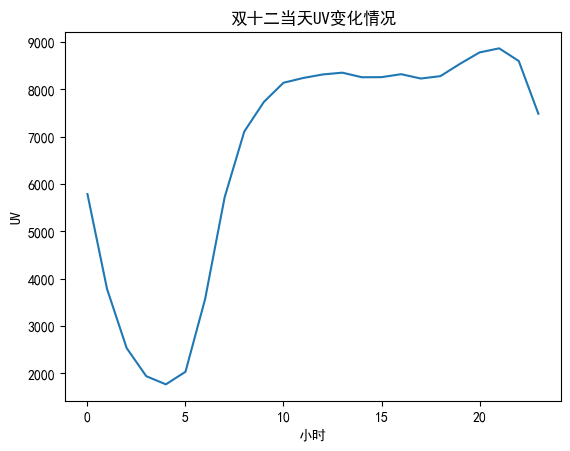

In [26]:
sns.lineplot(x=UV_12_hour['hour'],y=UV_12_hour['UV_12_hour_cnt'])
plt.title('双十二当天UV变化情况')
plt.xlabel('小时')
plt.ylabel('UV')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

可以看出零点的时候PV很高，和之前统计的区别比较大，应该是零点的时候付尾款，抢优惠券等所致，而且出现许多尖锐的点，应该也是整点付款/抢优惠券所致

### (3)不同用户行为所对应流量分析
不同用户的购物行为有较大差异，比如有的喜欢加购物车一块购买，有的喜欢看中直接下单，因此我们将用户行为和小时进行分组来看一下PV和UV的变化情况

In [27]:
PV_behavior = data.groupby(['behavior_type','hour'])['user_id'].count()
PV_behavior = PV_behavior.reset_index()
PV_behavior =PV_behavior.rename(columns={'user_id': 'PV_behavior_cnt'})
PV_behavior.head()

,behavior_type,hour,PV_behavior_cnt
0,1,0,487341
1,1,1,252991
2,1,2,139139
3,1,3,93250
4,1,4,75832


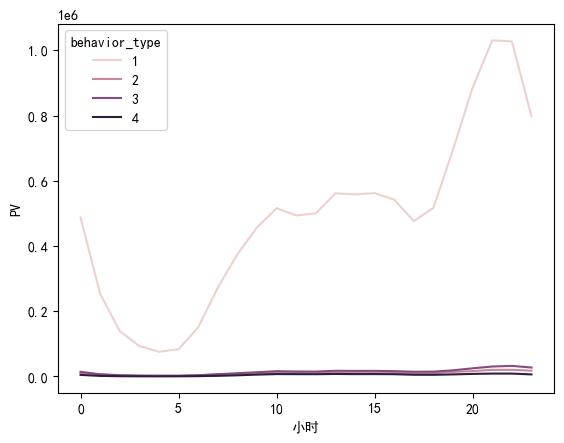

In [28]:
sns.lineplot(x = PV_behavior['hour'],y = PV_behavior['PV_behavior_cnt'],hue=PV_behavior['behavior_type'])
plt.xlabel('小时')
plt.ylabel('PV')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

我们发现1和别的差距太大导致看不太清楚2,3,4的变化趋势,我们把1排除掉继续看

In [29]:
PV_behavior_234 = data[data['behavior_type'] != 1].groupby(['behavior_type','hour'])['user_id'].count()
PV_behavior_234 = PV_behavior_234.reset_index()
PV_behavior_234 = PV_behavior_234.rename(columns={'user_id': 'PV_behavior_234_cnt'})
PV_behavior_234.head()

,behavior_type,hour,PV_behavior_234_cnt
0,2,0,11062
1,2,1,6276
2,2,2,3311
3,2,3,2282
4,2,4,2010


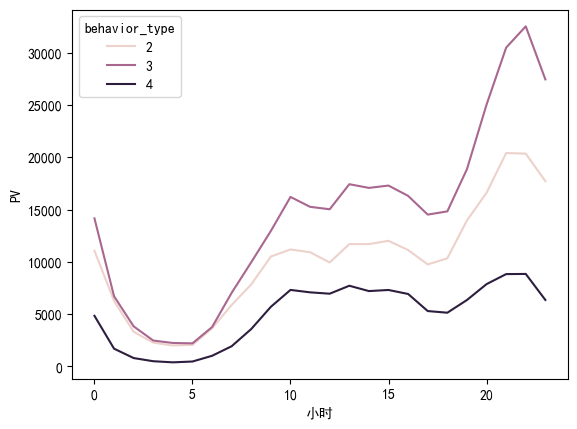

In [30]:
sns.lineplot(x = PV_behavior_234['hour'],y = PV_behavior_234['PV_behavior_234_cnt'],hue=PV_behavior_234['behavior_type'])
plt.xlabel('小时')
plt.ylabel('PV')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

可以看出4种行为按照小时的变化趋势基本一致，都是在晚上8点之后有明显增长，凌晨2-6点是低峰，符合常识

## 转化率分析
考虑漏斗:浏览——收藏或加购物车——购买三步漏斗每步对应的转化率:

In [31]:
behavior_type_cnt  =  data.groupby(['behavior_type'])['user_id'].count()
behavior_type_cnt

behavior_type
1    11550581
2      242556
3      343564
4      120205
Name: user_id, dtype: int64

In [32]:
scan_num  = behavior_type_cnt[1]
collect_num = behavior_type_cnt[2]
add_num = behavior_type_cnt[3]
buy_num = behavior_type_cnt[4]
collect_add_num = collect_num + add_num
print('浏览到收藏加购物车转化率为:', round(100*collect_add_num/scan_num,2))
print('收藏加购物车到购买转化率为:', round(100*buy_num/collect_add_num,2))
print('浏览到购买的转化率为：', round(100*buy_num/scan_num,2))

浏览到收藏加购物车转化率为: 5.07
收藏加购物车到购买转化率为: 20.51
浏览到购买的转化率为： 1.04


可以观察到，从浏览到加购/收藏的转化率大约5%；“加购/收藏”后到购买转化率大约为20%，这个比例还是还是非常高的，说明用户感兴趣的商品更容易成单。 两者相乘，我们能粗略估出从浏览到购买的转化率约为1%左右。当然也存在一些只买某一件商品直接浏览后购买的行为

下面我们来看看双十二当天的这些转化率和平常有什么差别

In [35]:
day_12 = data[data['date'] == '2014-12-12']
day_12_behavior = day_12.groupby('behavior_type')['user_id'].count()
day_12_behavior

behavior_type
1    641507
2     10446
3     24508
4     15251
Name: user_id, dtype: int64

In [36]:
day_12_scan_num = day_12_behavior[1]
day_12_collect_num = day_12_behavior[2]
day_12_add_num = day_12_behavior[3]
day_12_buy_num = day_12_behavior[4]
day_12_collect_add_num = day_12_collect_num + day_12_add_num
print('双十二当天浏览到收藏加购物车转化率为:', round(100*day_12_collect_add_num/day_12_scan_num,2))
print('双十二当天收藏加购物车到购买转化率为:', round(100*day_12_buy_num/day_12_collect_add_num,2))
print('双十二当天浏览到购买的转化率为：', round(100*day_12_buy_num/day_12_scan_num,2))

双十二当天浏览到收藏加购物车转化率为: 5.45
双十二当天收藏加购物车到购买转化率为: 43.63
双十二当天浏览到购买的转化率为： 2.38


可以看出，双十二当天，加购/收藏 到 购买转化率是平时的2倍之多，此外，加购/收藏 的转化率也比平时高出不少，说明大促的运营活动对用户活跃度的转化起到了很好的促进作用。

## 用户购买频次分析
从上面的统计结果来看，用户的点击数据是最多的，但是从淘宝盈利的角度来说，只有购买行为是商家最为关注的，这里就会引入一个问题：在给定的数据集上，淘宝用户购买东西的频次有多少？

In [37]:
data_usr_buy = data[data['behavior_type'] == 4].groupby('user_id')['user_id'].count().reset_index(name='usr_buy_cnt')
data_usr_buy.head()

,user_id,usr_buy_cnt
0,4913,6
1,6118,1
2,7528,6
3,7591,21
4,12645,8


<Axes: xlabel='user_id'>

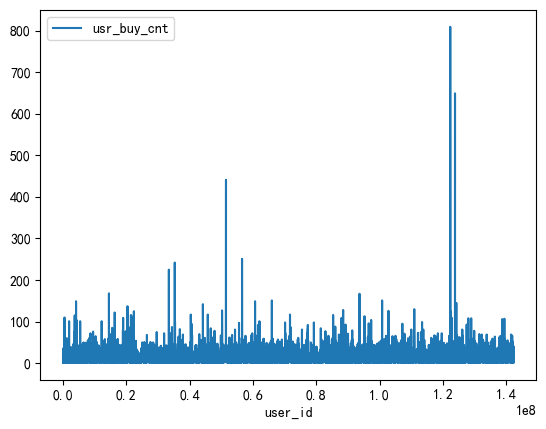

In [38]:
data_usr_buy.plot(x='user_id', y='usr_buy_cnt')

X轴代表user_id，Y轴是每个用户的购买次数。可以看到，大部分用户的购买次数均不超过50次，这期间还包括了双十二当天的集中购物，排除双十二高峰，实际消费次数会更少。当然也有部分用户的购买次数超过百次，甚至有超过800次的，高频消费的用户可以看作是忠实的超级用户。

## ARPU和ARPPU分析 <br>
ARPU = 每日消费总次数 / 每日活跃用户数<br>
ARPPU = 总收入/活跃用户付费数量<br>

In [39]:
buy_cnt = data[data['behavior_type'] == 4].groupby('date')['user_id'].count().reset_index(name='每日消费总次数')
buy_cnt.head()

,date,每日消费总次数
0,2014-11-18,3730
1,2014-11-19,3686
2,2014-11-20,3462
3,2014-11-21,3021
4,2014-11-22,3570


In [40]:
active_cnt = data.groupby('date')['user_id'].nunique().reset_index(name = '每日活跃用户数')
active_cnt.head()

,date,每日活跃用户数
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187


In [41]:
df = pd.DataFrame({'日期':active_cnt['date'],'每日消费总次数':buy_cnt['每日消费总次数'],'每日活跃用户数':active_cnt['每日活跃用户数']})
df['ARPU'] = df['每日消费总次数']/df['每日活跃用户数']
df.head()

,日期,每日消费总次数,每日活跃用户数,ARPU
0,2014-11-18,3730,6343,0.588050
1,2014-11-19,3686,6420,0.574143
2,2014-11-20,3462,6333,0.546660
3,2014-11-21,3021,6276,0.481358
4,2014-11-22,3570,6187,0.577016


由于在该数据集中没有收益金额，因此我们可以对计算方式做一点转化，将总收入转化为总的购买行为次数。
定义如下：ARPPU = 当日总消费次数/当日付费用户数

In [42]:
active_buy_cnt = data[data['behavior_type'] == 4].groupby('date')['user_id'].nunique().reset_index(name = '当日付费用户数')
active_buy_cnt.head()

,date,当日付费用户数
0,2014-11-18,1539
1,2014-11-19,1511
2,2014-11-20,1492
3,2014-11-21,1330
4,2014-11-22,1411


In [44]:
df['当日付费用户数'] = active_buy_cnt['当日付费用户数']
df['ARPPU'] = df['每日消费总次数']/df['当日付费用户数']
df

,日期,每日消费总次数,每日活跃用户数,ARPU,当日付费用户数,ARPPU
0,2014-11-18,3730,6343,0.588050,1539,2.423652
1,2014-11-19,3686,6420,0.574143,1511,2.439444
2,2014-11-20,3462,6333,0.546660,1492,2.320375
3,2014-11-21,3021,6276,0.481358,1330,2.271429
4,2014-11-22,3570,6187,0.577016,1411,2.530120
5,2014-11-23,3347,6373,0.525184,1436,2.330780
6,2014-11-24,3426,6513,0.526025,1524,2.248031
7,2014-11-25,3464,6351,0.545426,1497,2.313961
8,2014-11-26,3573,6357,0.562058,1487,2.402824
9,2014-11-27,3670,6359,0.577135,1527,2.403405


可以看到，针对活跃的下单用户来讲，平均每日消费次数在2-2.5次之间波动，双十二当天该数值达超过3.91，一个可能的原因是用户会在平时把喜欢的商品进行加购，等到双十二促销当天再下单购买